# Assignment-3


Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable. The counselor of the firm is supposed check whether the student
will get an admission or not based on his/her GRE score and Academic Score. So to help the
counselor to take appropriate decisions build a machine learning model classifier using Decision
tree to predict whether a student will get admission or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [71]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [72]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Drop Serial No column

In [73]:
dataset.drop('Serial No.', axis=1, inplace=True)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Splitting dataset into training and testing set

In [74]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Chance of Admit ', axis=1)
y = dataset['Chance of Admit ']

# Converting the 'Chance of Admit ' to 1 and 0

In [75]:
for i in range(0, len(y)):
    y[i] = round(y[i])
y    

<ipython-input-75-a1828eb686c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = round(y[i])


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [76]:
y.value_counts()

1.0    365
0.0     35
Name: Chance of Admit , dtype: int64

In [77]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='gini', splitter='best')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

len(X_train), len(X_test), len(y_train), len(y_test)

(300, 100, 300, 100)

# Fitting the Decission Tree on the training set

In [78]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4537037037037037, 0.95, 'X[5] <= 7.85\ngini = 0.164\nsamples = 300\nvalue = [27, 273]'),
 Text(0.25925925925925924, 0.85, 'X[4] <= 2.75\ngini = 0.459\nsamples = 28\nvalue = [18, 10]'),
 Text(0.18518518518518517, 0.75, 'X[1] <= 104.5\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.14814814814814814, 0.65, 'X[0] <= 307.0\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.07407407407407407, 0.55, 'X[0] <= 301.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.037037037037037035, 0.45, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.1111111111111111, 0.45, 'X[2] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.07407407407407407, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14814814814814814, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2222222222222222, 0.55, 'X[0] <= 313.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18518518518518517, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25925925925925924

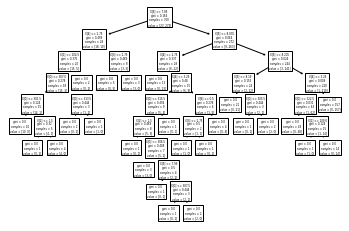

In [79]:
tree.plot_tree(tree_model)

In [80]:
y_preds = tree_model.predict(X_test)
y_preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [81]:
from sklearn.metrics import  mean_absolute_error, accuracy_score, confusion_matrix

mae = mean_absolute_error(y_test, y_preds)
acc = accuracy_score(y_test, y_preds)
cm = confusion_matrix(y_test, y_preds)

print(f'MAE: {mae}, ACC: {acc}')

MAE: 0.08, ACC: 0.92


In [82]:
print(cm)

[[ 3  5]
 [ 3 89]]
